In [21]:
import numpy as np
import matplotlib.pyplot as plt
import OpinionModel
rng = np.random.default_rng()

Stochastic

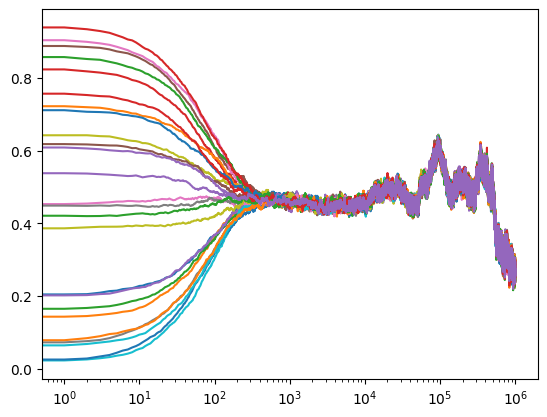

In [22]:
model = OpinionModel.Stochastic()
model.phi = lambda h : 0.01 + 0 * h
model.stochastic = lambda x : 0.05 * rng.uniform(-1, 1, size=np.shape(x))
x = rng.random(size=25)
steps, nodes = model.generate(x=x, steps=1000000)
for i in range(len(nodes[:,0])):
    plt.plot(steps, nodes[i,:])
plt.xscale('log')

Bounded confidence:

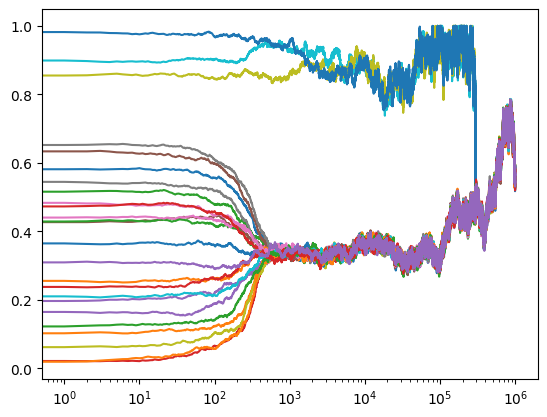

In [26]:
model = OpinionModel.Stochastic()
model.phi = lambda h : 0.01 * (h<=0.25)
model.stochastic = lambda x : 0.05 * rng.uniform(-1, 1, size=np.shape(x))
x = rng.random(size=25)
steps, nodes = model.generate(x=x, steps=1000000)
for i in range(len(nodes[:,0])):
    plt.plot(steps, nodes[i,:])
plt.xscale('log')

Altered network

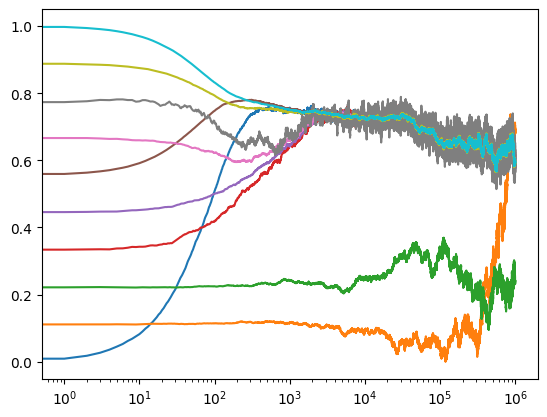

In [24]:
model = OpinionModel.Stochastic()
model.phi = lambda h : 0.01
model.stochastic = lambda x : 0.0005 * rng.uniform(-1, 1, size=np.shape(x))
x = rng.random(size=25)

diGraph = rng.exponential(0.5, size=(10,10)) * (rng.integers(10, size=(10,10))<1)
diGraph = 0.5 * (np.transpose(diGraph) + diGraph)
no_diagonal = diGraph * (np.diag(np.full(10, -1)) + np.ones((10, 10)))
steps, nodes = model.generate(steps=1000000, network=diGraph)
for i in range(len(nodes[:,0])):
    plt.plot(steps, nodes[i,:])
plt.xscale('log')

# MultiDim

In [25]:
model = OpinionModel.MultiDim()
model.phi = lambda h : 0.01 + 0 * h
model.stochastic = lambda x : 0.01 * rng.uniform(-1, 1, size=np.shape(x))
x = np.add.outer(np.linspace(0, 1, 5),np.linspace(0, 1, 5))
steps, nodes = model.generate(x=x, steps=1000000)
for i in range(len(nodes[:,0])):
    plt.plot(steps, nodes[i,:])
plt.title("$\phi=0.001$")
plt.xscale('log')

ValueError: could not broadcast input array from shape (5,5) into shape (5,)